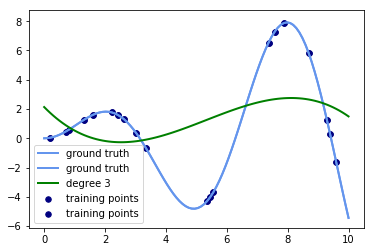

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x*np.sin(x)


"""sample = 200
x = np.arange(sample)
noise = 1e-8*np.asarray(random.sample(range(0,200),sample))
 
y = x**3*noise
y_norm=x**3*1e-6
plt.plot(x, y, label='Cubic With Noise')
plt.plot(x,y_norm, label='Cubic Without Noise')
plt.legend()
plt.show()"""

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

degree=3
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, color='green', linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()